# Natural Language Processing with Disaster Tweets

This notebook is my submission to the Kaggle competition to create a Natural Language Processing model to detect if tweets are concerning real disasters or not:

https://www.kaggle.com/c/nlp-getting-started/overview

### Table of Contents

* [1. Data Exploration](#DataExploration)
    * [1.1 Key Words](#1.1Keywords)
    * [1.2 Location](#1.2Location)
    * [1.3 Word Count](#1.3WordCount)
* [2. Preprocessing - Data Cleaning](#DataCleaning)
    * [2.1 Remove URL](#2.1RemoveURL)
    * [2.2 Handle Tags](#2.2HandleTags)
    * [2.3 Handle Emojis](#2.3HandleEmojis)
    * [2.4 Remove HTML Tag](#2.4RemoveHTMLTag)
    * [2.5 Remove Stopwords and Stemming](#2.5RemoveStopwordsandStemming)
    * [2.6 Remove Useless Characters](#2.6RemoveUselessCharacters)
* [3. Modelling](#Modelling)
    
    
    


# Import Libraries

In [20]:
# Install libraries that aren't in environment by default
!pip install seaborn
!pip install nltk
!pip install sklearn
!pip install jupyterthemes
!pip install demoji 

In [21]:
import pandas as pd
import numpy as np
# Import seaborn
import seaborn as sns

import re ##regular expression library .
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt') # download ntlk package to local computer 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


import demoji # emoji library 

# Import matplotlib library and set dark mode
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Change theme of notebook to dark mode
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\richard.dudbridge\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


### 1. Data Exploration <a class="anchor" id="DataExploration"></a>

First let's load the data and take a look

In [22]:
train = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\train_nlp.csv")
test = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\test_nlp.csv")

print('The train df has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test df has {} rows and {} columns'.format(test.shape[0], test.shape[1]))
train.head(3)

X = train[["text"]] # Features
y = train[["target"]] #Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

The train df has 7613 rows and 5 columns
The test df has 3263 rows and 4 columns
Training Data 6090
Testing Data 1523


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Let's take a look at the null count for each variable

In [24]:
train.isnull().sum(axis = 0)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Let's replace all null values with the mode value:

In [25]:
# replace null values in train df
for column in ['keyword']:
    train[column].fillna(train[column].mode()[0], inplace = True) 
for column in ['location']:
    train[column].fillna(train[column].mode()[0], inplace = True)
# replace null values in test df
for column in ['keyword']:
    test[column].fillna(test[column].mode()[0], inplace = True) 
for column in ['location']:
    test[column].fillna(test[column].mode()[0], inplace = True)

#### 1.1 Keywords <a class="anchor" id="1.1Keywords"></a>

Let's look at the top key words on disaster vs. non disaster tweets

C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'smoke'),
  Text(0, 1, 'blew%20up'),
  Text(0, 2, 'panicking'),
  Text(0, 3, 'electrocute'),
  Text(0, 4, 'collide'),
  Text(0, 5, 'bloody'),
  Text(0, 6, 'hellfire'),
  Text(0, 7, 'curfew'),
  Text(0, 8, 'upheaval'),
  Text(0, 9, 'body%20bag'),
  Text(0, 10, 'traumatised'),
  Text(0, 11, 'blizzard'),
  Text(0, 12, 'blazing'),
  Text(0, 13, 'blaze'),
  Text(0, 14, 'crush'),
  Text(0, 15, 'sinking'),
  Text(0, 16, 'screaming'),
  Text(0, 17, 'aftershock'),
  Text(0, 18, 'panic'),
  Text(0, 19, 'twister'),
  Text(0, 20, 'fear'),
  Text(0, 21, 'siren'),
  Text(0, 22, 'explode'),
  Text(0, 23, 'deluge'),
  Text(0, 24, 'wrecked'),
  Text(0, 25, 'ruin'),
  Text(0, 26, 'armageddon'),
  Text(0, 27, 'harm'),
  Text(0, 28, 'fatalities'),
  Text(0, 29, 'body%20bags')])

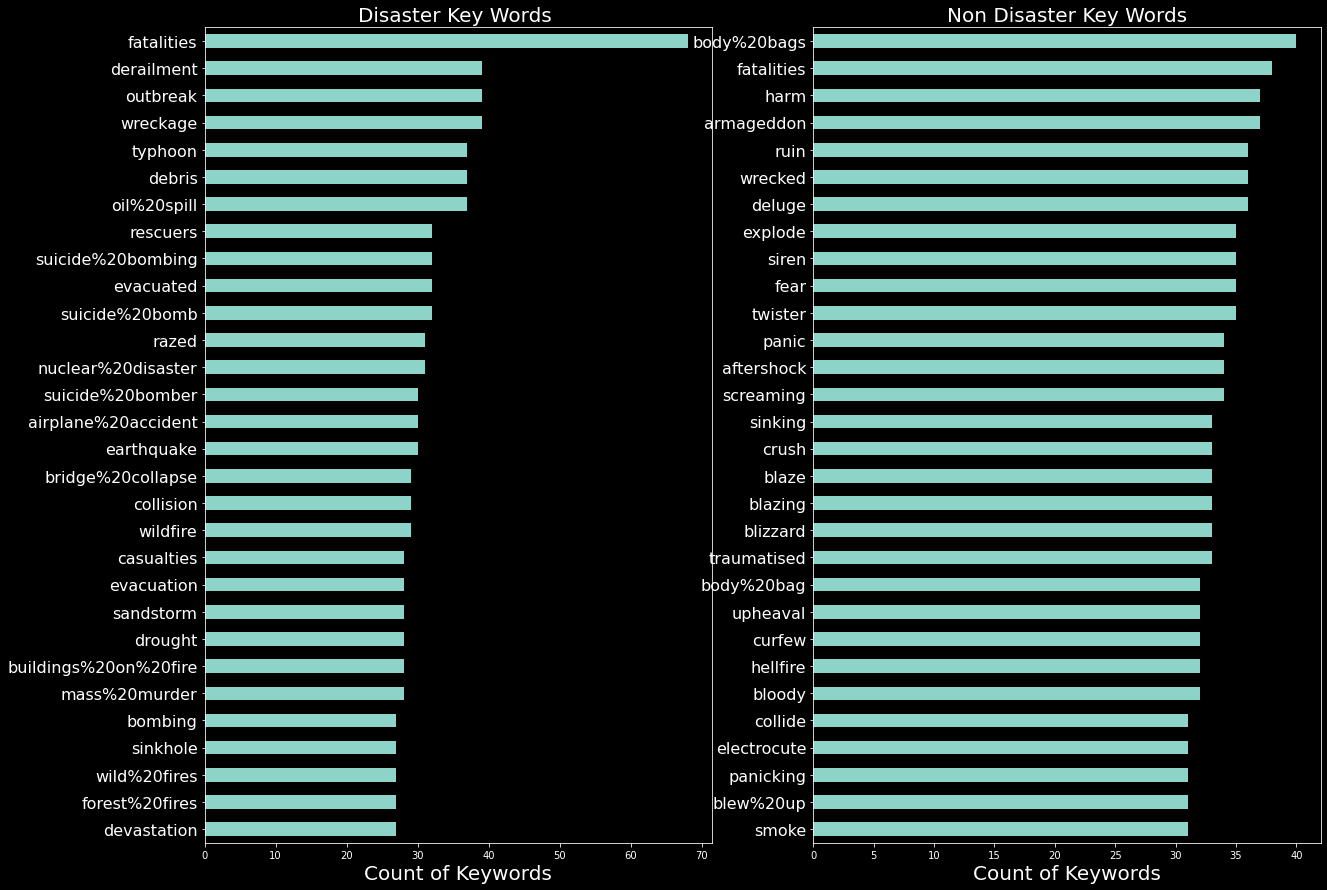

In [26]:
disaster_keywords = train.loc[train["target"] == 1]["keyword"].value_counts().nlargest(30).sort_values(ascending = True)
nondisaster_keywords = train.loc[train["target"] == 0]["keyword"].value_counts().nlargest(30).sort_values(ascending = True)

# Create blank figure
fig = plt.figure(figsize=(20,15))

# Add one plot at a time
plt.subplot(1, 2, 1)
disaster_keywords.plot.barh()
plt.title('Disaster Key Words ', fontsize=20)
plt.xlabel('Count of Keywords', fontsize=20)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
nondisaster_keywords.plot.barh()
plt.title('Non Disaster Key Words', fontsize=20)
plt.xlabel('Count of Keywords', fontsize=20)
plt.yticks(fontsize=16)

Let's take a look at the probability of disasters based on keywords

In [27]:
keywords_vc = pd.DataFrame({"Count": train["keyword"].value_counts()})

def keyword_disaster_probabilities(x):
    tweets_w_keyword = np.sum(train["keyword"].fillna("").str.contains(x))
    tweets_w_keyword_disaster = np.sum(train["keyword"].fillna("").str.contains(x) & train["target"] == 1)
    return tweets_w_keyword_disaster / tweets_w_keyword

keywords_vc["Disaster_Probability"] = keywords_vc.index.map(keyword_disaster_probabilities)

In [28]:
keywords_vc.sort_values(by="Disaster_Probability", ascending=False).head(10)

,Count,Disaster_Probability
debris,37,1.000000
wreckage,39,1.000000
derailment,39,1.000000
outbreak,40,0.975000
typhoon,38,0.973684
oil%20spill,38,0.973684
suicide%20bombing,33,0.969697
suicide%20bomber,31,0.967742
bombing,29,0.951613
suicide%20bomb,35,0.949495


In [29]:
keywords_vc.sort_values(by="Disaster_Probability").head(10)

,Count,Disaster_Probability
aftershock,34,0.000000
body%20bags,41,0.024390
ruin,37,0.027027
blazing,34,0.029412
screaming,36,0.055556
traumatised,35,0.057143
blew%20up,33,0.060606
panicking,33,0.060606
blight,32,0.062500
body%20bag,33,0.065421


#### 1.2 Location <a class="anchor" id="1.2Location"></a>

Let's take a look at the location of the tweets

C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

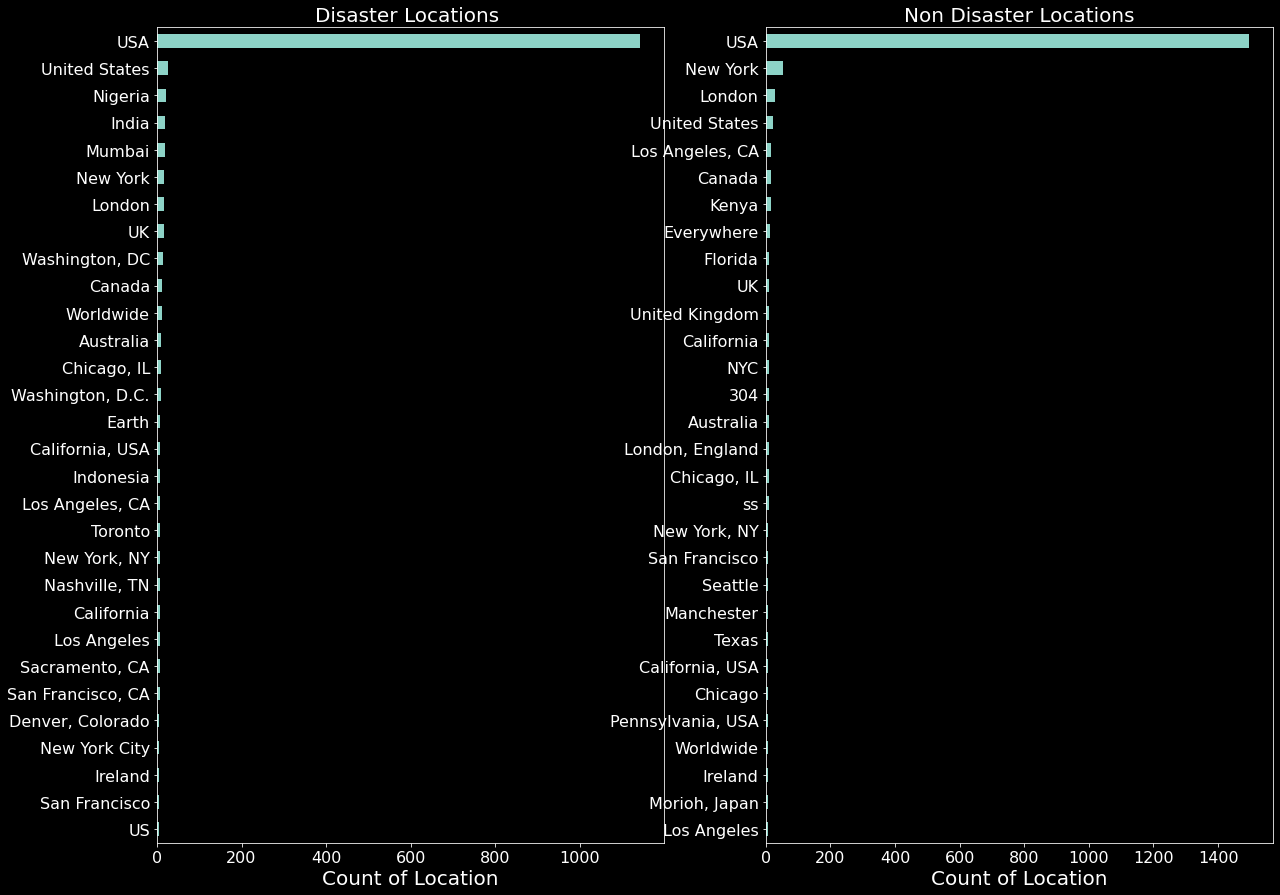

In [30]:
disaster_location = train.loc[train["target"] == 1]["location"].value_counts().nlargest(30).sort_values(ascending = True)
nondisaster_location = train.loc[train["target"] == 0]["location"].value_counts().nlargest(30).sort_values(ascending = True)

# Create blank figure
fig = plt.figure(figsize=(20,15))

# Add one plot at a time
plt.subplot(1, 2, 1)
disaster_location.plot.barh()
plt.title('Disaster Locations ', fontsize=20)
plt.xlabel('Count of Location', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1, 2, 2)
nondisaster_location.plot.barh()
plt.title('Non Disaster Locations', fontsize=20)
plt.xlabel('Count of Location', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

#### 1.3 Word Count <a class="anchor" id="1.3WordCount"></a>

Let's take a look at the number of words and character count to see if there is any relation to disaster / non disaster

In [31]:
# Add columns for word and character count
train['WordCount'] = train['text'].str.split().str.len()
train['CharacterCount'] = train['text'].str.len()
train.head()

,id,keyword,location,text,target,WordCount,CharacterCount
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,22,133
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,16,88


C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

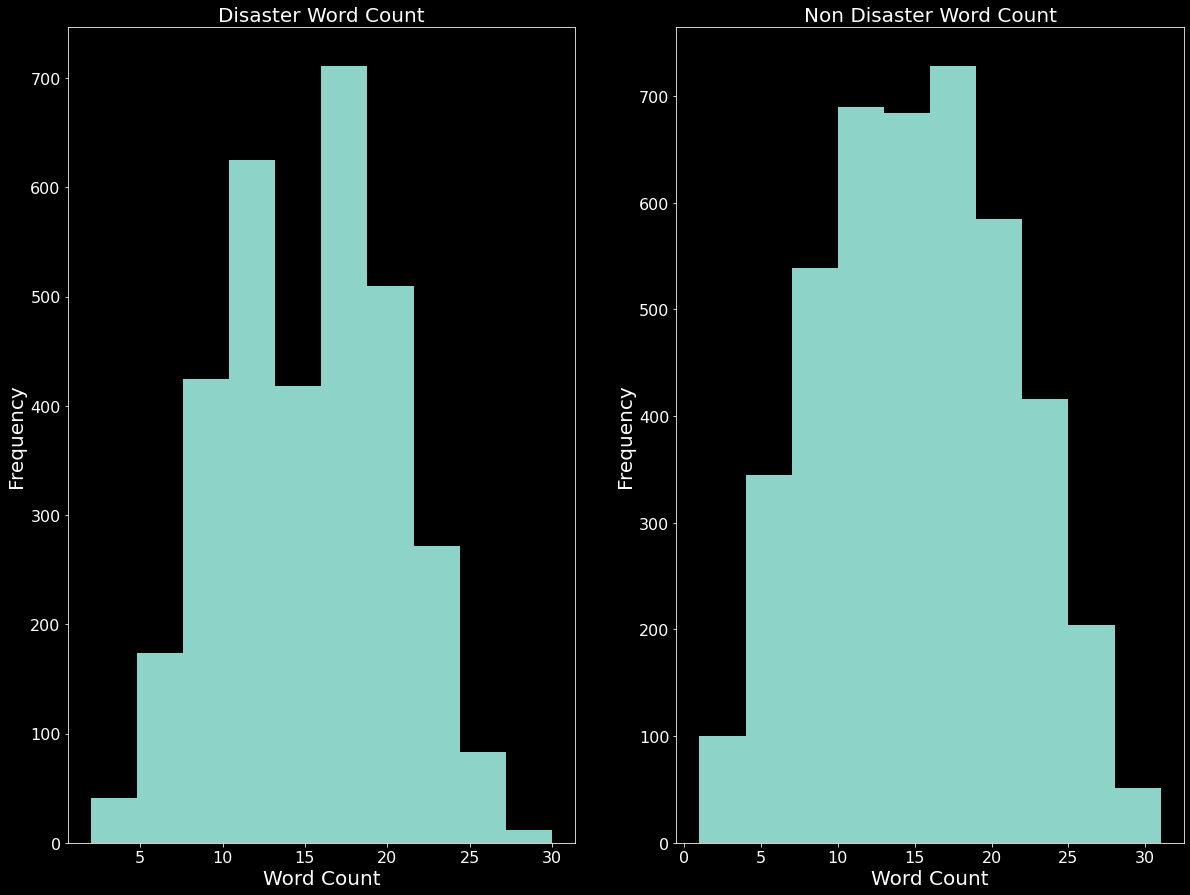

In [32]:
# Creates arrays for word count filtered by whether disaster or not
disaster_word_count = train.loc[train["target"] == 1]['WordCount']#
non_disaster_word_count = train.loc[train["target"] == 0]['WordCount']

# Create blank figure
fig = plt.figure(figsize=(20,15))

plt.subplot(1, 2, 1)
disaster_word_count.plot.hist()
plt.title('Disaster Word Count', fontsize=20)
plt.xlabel('Word Count', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1, 2, 2)
non_disaster_word_count.plot.hist()
plt.title('Non Disaster Word Count', fontsize=20)
plt.xlabel('Word Count', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

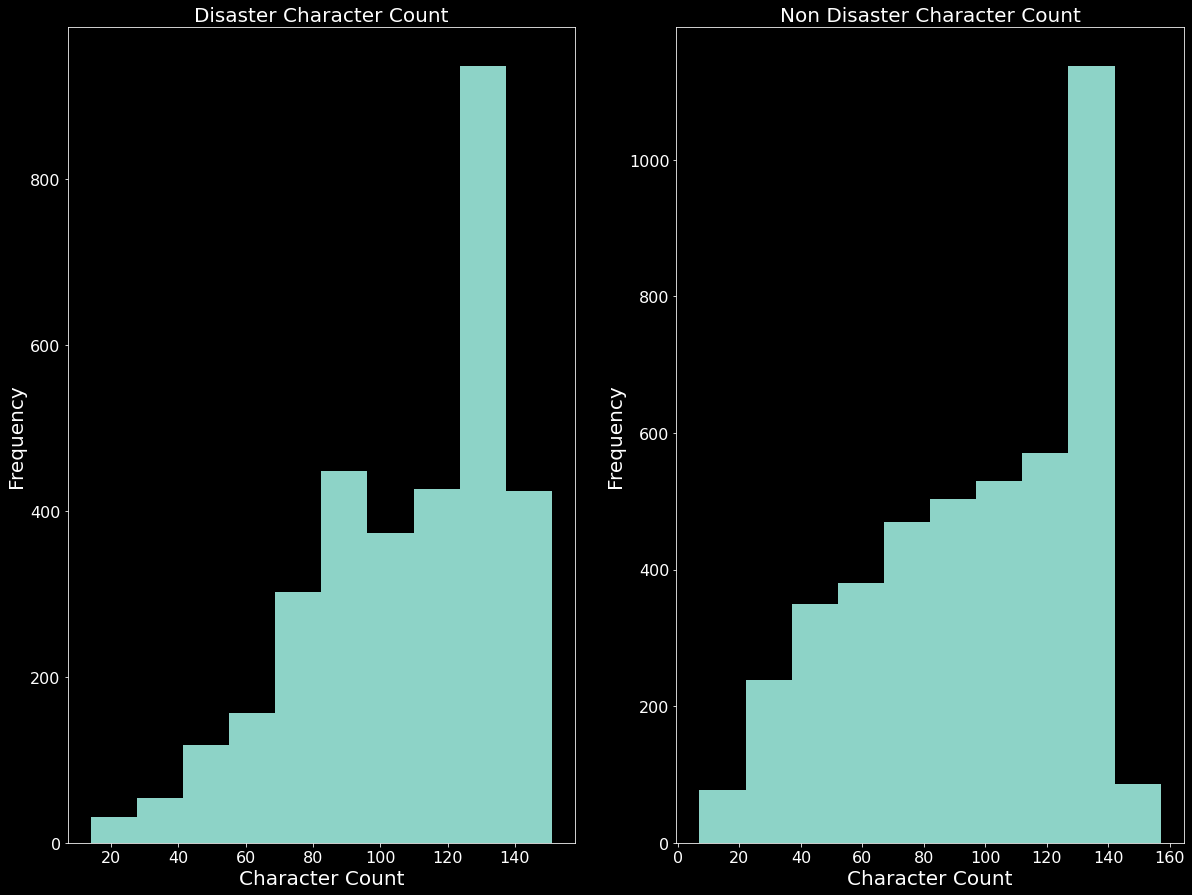

In [33]:
# Creates arrays for word count filtered by whether disaster or not
disaster_character_count = train.loc[train["target"] == 1]['CharacterCount']#
non_disaster_character_count = train.loc[train["target"] == 0]['CharacterCount']

# Create blank figure
fig = plt.figure(figsize=(20,15))

plt.subplot(1, 2, 1)
disaster_character_count.plot.hist()
plt.title('Disaster Character Count', fontsize=20)
plt.xlabel('Character Count', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1, 2, 2)
non_disaster_character_count.plot.hist()
plt.title('Non Disaster Character Count', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Character Count', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

Text(0, 0.5, 'Count')

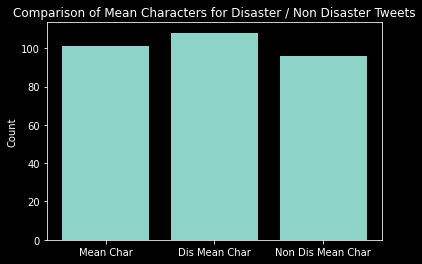

In [34]:
y1 = train['CharacterCount'].mean()
y2 = train.loc[train['target']==1] ['CharacterCount'].mean()
y3 = train.loc[train['target']==0] ['CharacterCount'].mean()
x = ['Mean Char', 'Dis Mean Char', 'Non Dis Mean Char']
y = [y1, y2, y3]
plt.bar(x,y)
plt.title('Comparison of Mean Characters for Disaster / Non Disaster Tweets')
plt.ylabel('Count')

In [35]:
def avg_word_length(x):
    return np.sum([len(w) for w in x.split()]) / len(x.split())

train["avg_word_length"] = train["text"].apply(avg_word_length)
train.head()

,id,keyword,location,text,target,WordCount,CharacterCount,avg_word_length
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,8,65,7.125000
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,16,88,4.500000


### 2. Preprocessing - Data Cleaning <a class="anchor" id="DataCleaning"></a>  

Let's clean up the text data that is incorrect, incomplete, irrelevant, duplicated or incorrectly formatted

6 functions have been created to perform the following operaitons to the text:

1. Remove Url
2. Handle Tags
3. Handle emoji's
4. Remove HTML Tags
5. Remove stopwords
6. Removing Useless Characters

#### 2.1 Remove URL <a class="anchor" id="2.1RemoveURL"></a>

In [36]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

print("Example of text with URL: \n", X_train['text'][3912], end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_Url)
print("Example of text without URL: \n", X_train['text'][3912])

Example of text with URL: 
 JKL cancels Flash Flood Warning for Bell Harlan Knox [KY]  http://t.co/4rY6zhcPOQ #WX

Example of text without URL: 
 JKL cancels Flash Flood Warning for Bell Harlan Knox [KY]   #WX


C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### 2.2 Handle Tags <a class="anchor" id="2.2HandleTags"></a> 

In [37]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)


print("Example of text without Handling Tags: \n", X_train['text'][3919],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train['text'][3919])

Example of text without Handling Tags: 
 @CreationMin @rwrabbit @GoonerAtheist @atheistic_1 @LOLatJesus Yet still why did so many fish die in the worldwide flood? I wonder.

Example of text with Handling Tags: 
      Yet still why did so many fish die in the worldwide flood? I wonder. CreationMin rwrabbit GoonerAtheist atheistic_1 LOLatJesus CreationMin rwrabbit GoonerAtheist atheistic_1 LOLatJesus CreationMin rwrabbit GoonerAtheist atheistic_1 LOLatJesus


C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


#### 2.3 Handle Emojis <a class="anchor" id="2.3HandleEmojis"></a>  

In [38]:
demoji.download_codes() # download emoji codes 

# function for replaceing emojis with description 
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

... OK (Got response in 0.45 seconds)
Writing emoji data to C:\Users\richard.dudbridge\.demoji\codes.json ...
... OK


#### 2.4 Remove HTML Tag <a class="anchor" id="2.4RemoveHTMLTag"></a>    

In [39]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

X_train['text'] = X_train['text'].apply(Remove_html)

C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 2.5 Remove Stopwords and Stemming <a class="anchor" id="2.5RemoveStopwordsandStemming"></a>     

In [40]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\richard.dudbridge\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richard.dudbridge\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
stopword = stopwords.words('english')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

print("Example of text before Removing Stopwords: \n", X_train['text'][200],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train['text'][200])

Example of text before Removing Stopwords: 
 HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPONDING WITH DUAL SIRENS ANDÛ_    



C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Example of text after Removing Stopwords and Stemming: 
 happen now - hatzolah em ambul respond with dual siren andû_


#### 2.6 Remove Useless Characters <a class="anchor" id="2.6RemoveUselessCharacters"></a>      

In [42]:

def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    # Remove spaces
    return re.sub(' +', ' ', thestring)

In [43]:
print("Example of text before Removing Useless Character: \n", X_train['text'][200],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", X_train['text'][200])

Example of text before Removing Useless Character: 
 happen now - hatzolah em ambul respond with dual siren andû_



C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Example of text after Removing Useless Character: 
 happen now hatzolah ambul respond with dual siren and


Apply data pre-processing to test data

In [44]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)


C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\richard.dudbridge\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Apply pre-processing to submission test file

In [45]:
# Step 1. Remove Url
test['text'] = test['text'].apply(Remove_Url)
# Step 2. Handle Tags
test['text'] = test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
test['text'] = test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
test['text'] = test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
test['text'] = test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
test['text'] = test['text'].apply(Remove_UC)


Convert y_train and y_test to just the target column 

In [46]:
y_train  = y_train['target']
y_test  = y_test['target']

In [47]:
%%time
#smooth_idf=True by default so smoothing is done by defult.
#norm is l2 by default.
#subliner is used False by default.
vectorizer = TfidfVectorizer(min_df = 0.0005, 
                             max_features = 100000, 
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])
# vectorise submission test data
test = vectorizer.transform(test['text'])

Wall time: 746 ms


In [48]:
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  6090 | Training Features: 4863
Testing Points:  1523 | Testing Features: 4863

Training Points:  6090
Testing Points:  1523


### 3. Modelling <a class="anchor" id="Modelling"></a>   

Support Vector Machine algorithm is tried first.

In [49]:
%%time
Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.7971109652002626
Macro precision_recall_fscore_support
(0.8013935802841885, 0.7815764792163971, 0.7867307341093875, None)
Micro precision_recall_fscore_support
(0.7971109652002626, 0.7971109652002626, 0.7971109652002626, None)
Weighted precision_recall_fscore_support
(0.7992379015506689, 0.7971109652002626, 0.7936817817148843, None)
Wall time: 3.8 s


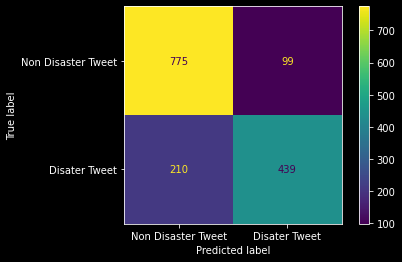

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Model,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels= ['Non Disaster Tweet', 'Disater Tweet'])

We can see that there were 210 disaster tweets which were incorrectly labellled as non disaster tweets. The model performs better at identifying non disaster tweets than actual disaster tweets.The model performs reasonably well.

### Submit Predictions

In [51]:
# Make prediction using the test data provided by the competition 
predictions = Model.predict(test)

In [55]:
sample_submission = pd.read_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\sample_submission.csv")

sample_submission['target'] = predictions
sample_submission.to_csv(r"C:\Users\richard.dudbridge\Documents\Python Scripts\NLP Disaster Tweets_submission.csv", index=False)